In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os

## Brownian Motion 1

In [13]:
os.mkdir('lattice_plots_bm')

## Brownian Motion 2

This one works

In [14]:
"""
brownian() implements one dimensional Brownian motion (i.e. the Wiener process).
"""

# File: brownian.py

from math import sqrt
from scipy.stats import norm
import numpy as np


def brownian(x0, n, dt, delta, out=None):
    """
    Generate an instance of Brownian motion (i.e. the Wiener process):

        X(t) = X(0) + N(0, delta**2 * t; 0, t)

    where N(a,b; t0, t1) is a normally distributed random variable with mean a and
    variance b.  The parameters t0 and t1 make explicit the statistical
    independence of N on different time intervals; that is, if [t0, t1) and
    [t2, t3) are disjoint intervals, then N(a, b; t0, t1) and N(a, b; t2, t3)
    are independent.
    
    Written as an iteration scheme,

        X(t + dt) = X(t) + N(0, delta**2 * dt; t, t+dt)


    If `x0` is an array (or array-like), each value in `x0` is treated as
    an initial condition, and the value returned is a numpy array with one
    more dimension than `x0`.

    Arguments
    ---------
    x0 : float or numpy array (or something that can be converted to a numpy array
         using numpy.asarray(x0)).
        The initial condition(s) (i.e. position(s)) of the Brownian motion.
    n : int
        The number of steps to take.
    dt : float
        The time step.
    delta : float
        delta determines the "speed" of the Brownian motion.  The random variable
        of the position at time t, X(t), has a normal distribution whose mean is
        the position at time t=0 and whose variance is delta**2*t.
    out : numpy array or None
        If `out` is not None, it specifies the array in which to put the
        result.  If `out` is None, a new numpy array is created and returned.

    Returns
    -------
    A numpy array of floats with shape `x0.shape + (n,)`.
    
    Note that the initial value `x0` is not included in the returned array.
    """

    x0 = np.asarray(x0)

    # For each element of x0, generate a sample of n numbers from a
    # normal distribution.
    r = norm.rvs(size=x0.shape + (n,), scale=delta*sqrt(dt))

    # If `out` was not given, create an output array.
    if out is None:
        out = np.empty(r.shape)

    # This computes the Brownian motion by forming the cumulative sum of
    # the random samples. 
    np.cumsum(r, axis=-1, out=out)

    # Add the initial condition.
    out += np.expand_dims(x0, axis=-1)

    return out

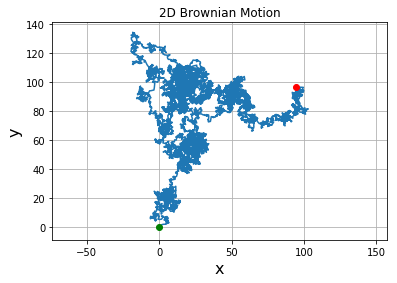

In [15]:
import numpy
from pylab import plot, show, grid, axis, xlabel, ylabel, title

# The Wiener process parameter.
delta = 0.25*100
# Total time.
T = 10.0
# Number of steps.
N = 10000
# Time step size
dt = T/N
# Initial values of x.
x = numpy.empty((2,N+1))
x[:, 0] = 0.0

brownian(x[:,0], N, dt, delta, out=x[:,1:])

    
# Plot the 2D trajectory.
plot(x[0],x[1])

# Mark the start and end points.
plot(x[0,0],x[1,0], 'go')
plot(x[0,-1], x[1,-1], 'ro')

# More plot decorations.
title('2D Brownian Motion')
xlabel('x', fontsize=16)
ylabel('y', fontsize=16)
axis('equal')
grid(True)
show()

In [16]:
np.shape(x)


(2, 10001)

In [17]:
L=100 # length of array

# Create the array of coordinates
coords = np.random.rand(2,100)*L
coords = np.repeat(coords[:, :, np.newaxis], N+2, axis=2)
#coords[0]
# coords = position x point_index x N_time_points

In [18]:
npoints=100

# Calculate the brownian motion for every point independently 
for n in range(npoints):
    init_=coords[:,n,0]
    brownian(init_, N, dt, delta, out=x[:,1:])
    coords[:,n,1:]=x
    

In [19]:
# Brownian Motion for one point
# np.shape(coords)
# for i in range(1,N):
#     print(coords[:,5,i])

In [ ]:

for i in range(1,N):
    plt.figure(i-1, figsize=(6,6))
    axes = plt.gca()
    axes.set_xlim([0,100])
    axes.set_ylim([0,100])
    
    plt.scatter(coords[0,:,i],coords[1,:,i], color='b')
    #plt.arrow(i+0.5 - x*0.5, j+0.5 - y*0.5, x, y, length_includes_head=True, head_width=0.3)
    plt.savefig('lattice_plots_bm/lattice_%03d.png'%(i))
    plt.close(i-1)

In [ ]:
# First attempt, does not work well

# N=1000
# L=100
# coords = np.random.rand(2,100)*L
# coords = np.repeat(coords[:, :, np.newaxis], N, axis=2)
# #coords[0]


# for i in range(1,N):
#     plt.figure(i, figsize=(6,6))
#     axes = plt.gca()
#     axes.set_xlim([0,100])
#     axes.set_ylim([0,100])

#     # select random position to move
#     index_ = np.random.randint(0,np.shape(coords)[1])
#     print(index_)
#     dx, dy = np.random.normal(size=2)
#     coords[:,index_,i] = coords[:,index_,i-1]
#     coords[:,index_,i] = coords[0,index_,i]+dx, coords[1,index_,i]+dy
    
#     plt.scatter(coords[0,:,i],coords[1,:,i], color='b')
#     #plt.arrow(i+0.5 - x*0.5, j+0.5 - y*0.5, x, y, length_includes_head=True, head_width=0.3)
#     plt.savefig('lattice_plots_bm/lattice_%03d.png'%(i))
#     plt.close(i)
    
    